#Plotting Sigmoid Function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.colors
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook

Since we have seen MP_Neuron and Perceptron.Let's add some non linearity to cover non linear functions as well.


$S_{w, b}(x) = \frac{1}{1 + e^{-(wx + b)}}$

In [2]:
def sigmoid(x, w, b):
  return 1/(1 + np.exp(-(w*x + b)))

In [3]:
sigmoid(1, 0.5, 0)

0.6224593312018546

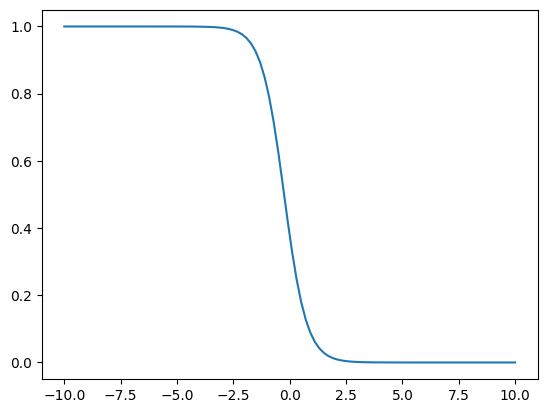

In [4]:
w = -2    #@param {type: "slider", min: -2, max: 2, step: 0.1}
b = -0.5  #@param {type: "slider", min: -2, max: 2, step: 0.1}
X = np.linspace(-10,10,100) #100 values between -10 and 10.
Y = sigmoid(X, w, b)

plt.plot(X, Y)
plt.show()


$S_{w_1, w_2, b}(x_1, x_2) = \frac{1}{1 + e^{-(w_1x_1 + w_2x_2 + b)}}$

In [5]:
def sigmoid_2d(x1, x2, w1, w2, b):
  return 1/(1 + np.exp(-(w1*x1 + w2*x2 + b)))

In [6]:
sigmoid_2d(1, 0, 0.5, 0, 0)

0.6224593312018546

In [7]:
X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 100)

XX1, XX2 = np.meshgrid(X1, X2)

print(X1.shape, X2.shape, XX1.shape, XX2.shape)

(100,) (100,) (100, 100) (100, 100)


In [8]:
!pip install tabulate

from tabulate import tabulate
print(X1)
print("*"*50)
print(X2)
print("*"*50)
print(tabulate(XX1, tablefmt="grid"))
print("*"*50)
print(tabulate(XX2, tablefmt="grid"))
print("*"*50)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919
  -8.98989899  -8.78787879  -8.58585859  -8.38383838  -8.18181818
  -7.97979798  -7.77777778  -7.57575758  -7.37373737  -7.17171717
  -6.96969697  -6.76767677  -6.56565657  -6.36363636  -6.16161616
  -5.95959596  -5.75757576  -5.55555556  -5.35353535  -5.15151515
  -4.94949495  -4.74747475  -4.54545455  -4.34343434  -4.14141414
  -3.93939394  -3.73737374  -3.53535354  -3.33333333  -3.13131313
  -2.92929293  -2.72727273  -2.52525253  -2.32323232  -2.12121212
  -1.91919192  -1.71717172  -1.51515152  -1.31313131  -1.11111111
  -0.90909091  -0.70707071  -0.50505051  -0.3030303   -0.1010101
   0.1010101    0.3030303    0.50505051   0.70707071   0.90909091
   1.11111111   1.31313131   1.51515152   1.71717172   1.91919192
   2.12121212   2.32323232   2.52525253   2.72727273   2.92929293
   3.13131313   3.33333333   3.53535354   3.

In [9]:
w1 = 2
w2 = -0.5
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+-----------

In [10]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

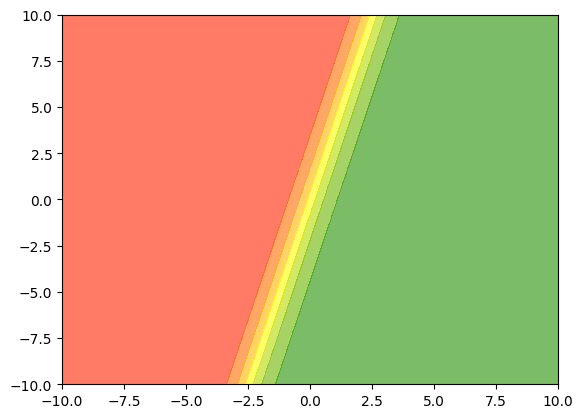

In [11]:
plt.contourf(XX1, XX2, Y, cmap = my_cmap, alpha = 0.6)
plt.show()

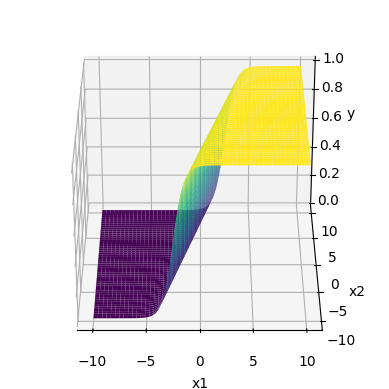

In [12]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(30, 270)


# Compute Loss for a Given Dataset

In [13]:
w_unknown = 0.5
b_unknown = 0.25

X = np.random.random(25) * 20 - 10
Y = sigmoid(X, w_unknown, b_unknown)

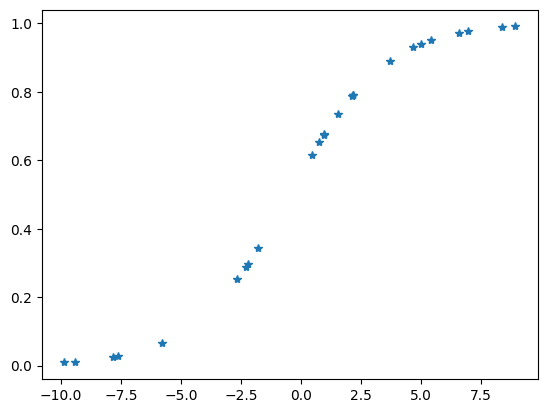

In [14]:
plt.plot(X, Y, '*')
plt.show()

$S_{w, b}(x) = \frac{1}{1 + e^{-(wx + b)}}$

$L(\theta) = ∑(y-\hat{y})^2$

In [15]:
def calculate_loss(X, Y, w_est, b_est):
  loss = 0
  for x, y in zip(X, Y):
    loss += (y - sigmoid(x, w_est, b_est))**2
  return loss

In [16]:
W = np.linspace(0, 2, 101)
B = np.linspace(-1, 1, 101)

WW, BB = np.meshgrid(W, B)

Loss = np.zeros(WW.shape)

In [17]:
WW.shape

(101, 101)

In [18]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i, j] = calculate_loss(X, Y, WW[i, j], BB[i, j])

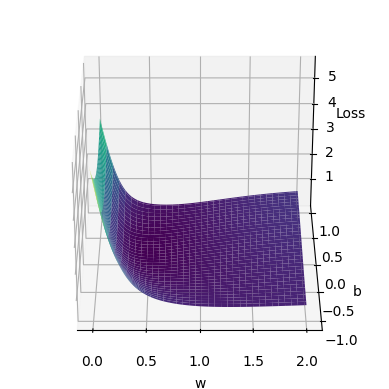

In [19]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')

ax.view_init(30, 270)

In [20]:
ij = np.argmin(Loss)
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij - i * Loss.shape[1])

In [21]:
print(i, j)

63 25


In [22]:
print(WW[i, j], BB[i, j])

0.5 0.26


# Class for Sigmoid Neuron

In [33]:
class SigmoidNeuron:
  
  def __init__(self):
    self.w = None
    self.b = None
    
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):
    
    # initialise w, b
    if initialise:
      #w should be equal to no of features.
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
      
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw = 0
      db = 0

      # for all the x,y pairs we calculate the dw, db and then update the weights and bias at the end.
      for x, y in zip(X, Y):
        dw += self.grad_w(x, y)
        db += self.grad_b(x, y)       
      self.w -= learning_rate * dw
      self.b -= learning_rate * db
      
      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        loss[i] = mean_squared_error(Y_pred, Y)
    
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)

# Fit for toy data

In [34]:
X = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5]])
Y = [1, 1, 1, 0, 0, 0]

In [35]:
sn = SigmoidNeuron()
sn.fit(X, Y, 1, 0.25, True)

<ipython-input-33-2c7d97eb5e0c>:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/1 [00:00<?, ?epoch/s]

In [36]:
def plot_sn(X, Y, sn, ax):
  X1 = np.linspace(-10, 10, 100)
  X2 = np.linspace(-10, 10, 100)
  XX1, XX2 = np.meshgrid(X1, X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j], X2[i]])
      YY[i, j] = sn.sigmoid(sn.perceptron(val))
  ax.contourf(XX1, XX2, YY, cmap=my_cmap, alpha=0.6)
  ax.scatter(X[:,0], X[:,1],c=Y, cmap=my_cmap)
  ax.plot()

<ipython-input-33-2c7d97eb5e0c>:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 0.14751561 -0.4107992 ]] [0.00175783]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 0.653015   -0.09874573]] [0.0107636]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 0.73296192 -0.3843446 ]] [-0.04961416]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 0.93291083 -0.16870671]] [-0.09676917]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 0.94536456 -0.44051926]] [-0.15616897]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.0973307  -0.25945629]] [-0.19874954]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.10888498 -0.44354957]] [-0.24951648]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.20745878 -0.34866344]] [-0.28578014]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.23442233 -0.43435511]] [-0.32459956]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.29332458 -0.41246118]] [-0.35579226]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.32955086 -0.44214773]] [-0.38639874]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.37036431 -0.44871415]] [-0.41380903]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.40570854 -0.46210846]] [-0.43959508]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.43944143 -0.47256449]] [-0.46355574]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.47090587 -0.48282144]] [-0.48599975]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.50053703 -0.49239684]] [-0.50706449]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.52850257 -0.50144341]] [-0.52689453]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.55497538 -0.51000649]] [-0.54561103]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.5801006  -0.51813381]] [-0.5633198]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.60400379 -0.52586602]] [-0.58011326]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.62679409 -0.53323852]] [-0.59607244]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.64856696 -0.54028221]] [-0.61126873]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.66940632 -0.54702428]] [-0.62576527]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.68938634 -0.55348874]] [-0.63961807]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.70857283 -0.55969691]] [-0.65287706]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.72702448 -0.56566776]] [-0.66558685]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.74479383 -0.5714183 ]] [-0.67778745]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.76192804 -0.5769638 ]] [-0.68951487]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.77846967 -0.582318  ]] [-0.70080161]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.7944572  -0.58749335]] [-0.71167707]


  0%|          | 0/1 [00:00<?, ?epoch/s]

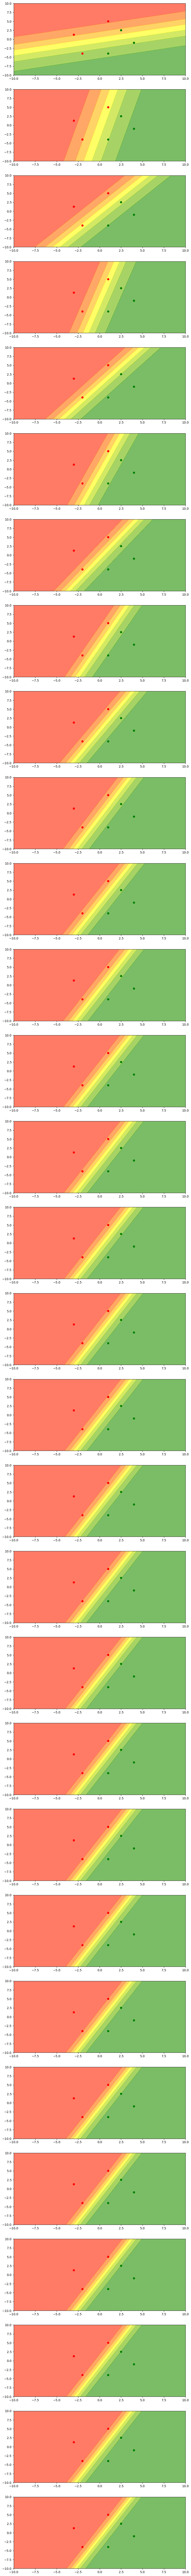

In [37]:
sn.fit(X, Y, 1, 0.05, True)
N = 30
plt.figure(figsize=(10, N*5))
for i in range(N):
  print(sn.w, sn.b)
  ax = plt.subplot(N, 1, i + 1)
  plot_sn(X, Y, sn, ax)
  sn.fit(X, Y, 1, 0.5, False)

# Load Data

In [39]:
data = pd.read_csv('/mobile_cleaned-1551253091700.csv')

In [40]:
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,0,1,0,0,0,1,4.4


In [41]:
data.shape

(341, 88)

In [42]:
X = data.drop('Rating', axis=1)

In [43]:
Y = data['Rating'].values

In [44]:
Y

array([4.5, 4.5, 4.4, 4.3, 4.4, 4.5, 4.3, 4.1, 4.3, 4.5, 4.5, 4. , 4.4,
       4.4, 4.4, 4.4, 4.5, 4.4, 4.4, 4.4, 4.4, 4.5, 4.4, 4.3, 4.2, 4.3,
       4.3, 4.6, 4.4, 4.5, 3.9, 4.2, 4.3, 4.2, 4.3, 4.3, 4.2, 4.4, 4.1,
       3.8, 4.4, 4.6, 4.3, 4.5, 4.5, 4.2, 3.9, 4.3, 4. , 4.3, 4.3, 3.9,
       4.2, 4.5, 4. , 4.6, 4.2, 2.8, 4.4, 4.3, 4.2, 4.4, 4.4, 4. , 4.4,
       4.4, 4.1, 4.5, 4.3, 3.9, 4.3, 4.1, 4.1, 4.2, 3.4, 4.2, 4.6, 3.8,
       4.3, 4.5, 4.2, 4.5, 4.5, 4. , 4.1, 4.4, 4.5, 4.1, 4.5, 4.3, 4.5,
       3.9, 3.9, 4.4, 4.4, 4.4, 4. , 4.1, 4.1, 4.4, 4.3, 4.3, 4.2, 4.3,
       3.4, 4.3, 4.3, 4.2, 4.6, 4.8, 4.4, 3.4, 3.7, 4.2, 4.3, 4.4, 4.3,
       4.2, 4.1, 4.3, 4. , 3.9, 4.4, 4.4, 3.9, 3.1, 3.7, 4.2, 4.4, 4. ,
       4. , 4.1, 4.2, 4.3, 4.2, 4.3, 4.1, 3.6, 4.1, 4. , 3.8, 3.7, 4.3,
       4.1, 4.1, 4.5, 4. , 4.3, 3.6, 4.1, 4.5, 3.5, 4. , 4.3, 4.6, 3.5,
       3.9, 4.1, 3.9, 3.8, 4.4, 4.3, 4. , 3.9, 4.4, 4.7, 3.9, 4.5, 3.7,
       4. , 4.3, 4.1, 4.8, 4.1, 4. , 4.7, 4. , 4.1, 4. , 3.4, 4.

In [48]:
threshold = 4.2
data['Class'] = (data['Rating'] >= threshold).astype(int)

In [49]:
data['Class'].value_counts(normalize=True)

0    0.533724
1    0.466276
Name: Class, dtype: float64

In [50]:
Y_binarised = data['Class'].values

In [51]:
Y_binarised

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

## Standardisation

In [52]:
R = np.random.random([100, 1])

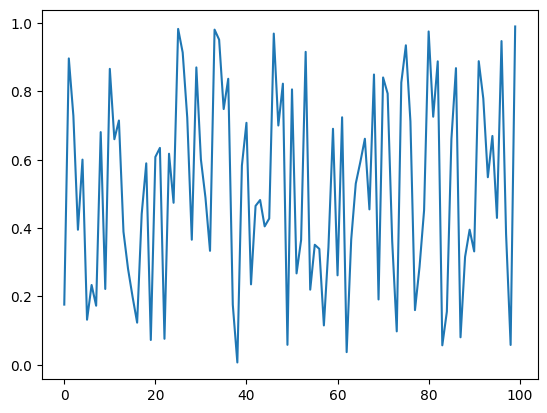

In [53]:
plt.plot(R)
plt.show()

In [54]:
np.mean(R)

0.5151011069464091

In [55]:
np.std(R)

0.28602856555325773

In [56]:
scaler = StandardScaler()

In [57]:
scaler.fit(R)

StandardScaler()

In [58]:
scaler.mean_

array([0.51510111])

In [59]:
RT = scaler.transform(R)

In [60]:
np.mean(RT)

1.865174681370263e-16

In [61]:
np.std(RT)

0.9999999999999998

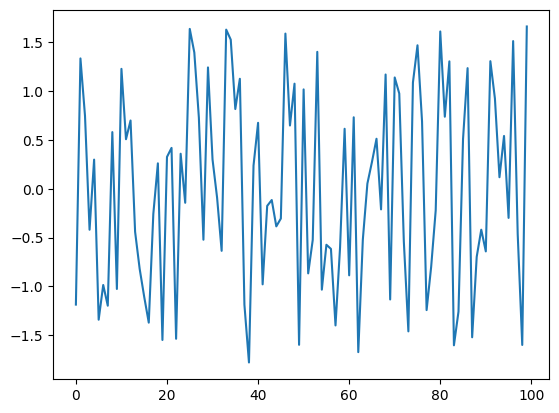

In [62]:
plt.plot(RT)
plt.show()

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, stratify=Y_binarised)

In [64]:
print(X_train.shape, X_test.shape)

(255, 87) (86, 87)


In [65]:
scaler = StandardScaler()

In [66]:
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [67]:
minmax_scaler = MinMaxScaler()

In [68]:
Y_scaled_train = minmax_scaler.fit_transform(Y_train.reshape(-1, 1))

In [69]:
np.min(Y_scaled_train)

0.0

In [70]:
Y_scaled_test = minmax_scaler.transform(Y_test.reshape(-1, 1))

In [71]:
scaled_threshold = list(minmax_scaler.transform(np.array([threshold]).reshape(1, -1)))[0][0]

In [72]:
scaled_threshold

0.6800000000000002

In [73]:
Y_binarised_train = (Y_scaled_train > scaled_threshold).astype("int").ravel()

In [74]:
Y_binarised_test = (Y_scaled_test > scaled_threshold).astype("int").ravel()

# Train on Real Data

In [75]:
sn = SigmoidNeuron()

<ipython-input-33-2c7d97eb5e0c>:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/2000 [00:00<?, ?epoch/s]

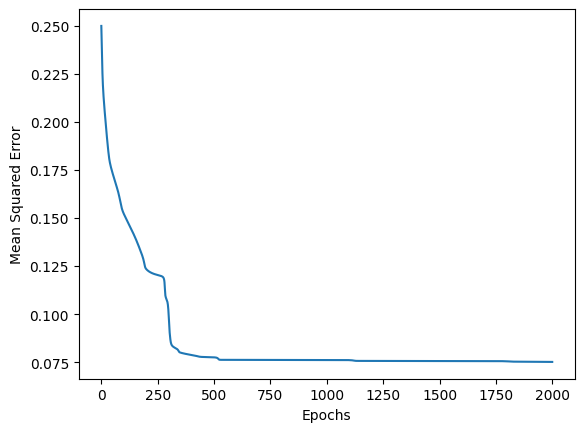

In [76]:
sn.fit(X_scaled_train, Y_scaled_train, epochs=2000, learning_rate=0.015, display_loss=True)

In [77]:
Y_pred_train = sn.predict(X_scaled_train)
Y_pred_test = sn.predict(X_scaled_test)

In [78]:
Y_pred_binarised_train = (Y_pred_train > scaled_threshold).astype("int").ravel()
Y_pred_binarised_test = (Y_pred_test > scaled_threshold).astype("int").ravel()

In [79]:
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_binarised_train)
accuracy_test  = accuracy_score(Y_pred_binarised_test, Y_binarised_test)

In [80]:
print(accuracy_train, accuracy_test)

0.7568627450980392 0.7558139534883721
